# Smoking Cessation Study - Cox regression

In [26]:
library(survival)

sdf = read.csv("../savrw2_survival_data_V2-Copy1.csv",na.strings="9999.0")    #read the output from the savrw2 notebook
str(sdf)

'data.frame':	436 obs. of  18 variables:
 $ X                     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ CallDayNumber         : num  86 86 86 86 86 86 86 86 86 86 ...
 $ firstcigarettereported: num  2 2 2 2 2 2 2 2 2 2 ...
 $ baseline_b1_001       : num  2 5 2 5 2 2 4 1 5 5 ...
 $ baseline_c1_001       : num  4 5 5 4 4 4 3 4 5 5 ...
 $ baseline_d1_001       : num  4 4 2 4 4 4 2 4 4 5 ...
 $ baseline_b1_002       : num  2 5 2 5 4 2 3 4 4 5 ...
 $ baseline_c1_002       : num  4 5 5 5 4 5 3 4 4 5 ...
 $ baseline_d1_002       : num  4 3 4 4 4 4 2 3 4 5 ...
 $ baseline_b1_003       : num  4 1 4 3 2 4 3 4 5 1 ...
 $ baseline_c1_003       : num  2 1 1 1 2 2 3 4 5 1 ...
 $ baseline_d1_003       : num  2 3 2 1 3 2 3 4 5 1 ...
 $ baseline_b1_004       : num  2 5 1 2 2 2 3 1 4 5 ...
 $ baseline_c1_004       : num  4 4 3 1 4 4 3 1 4 5 ...
 $ baseline_d1_004       : num  4 3 4 4 3 4 3 4 3 5 ...
 $ V37                   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ V70                   : num  NA NA NA NA

In [49]:
sdf <-  sdf[,-which(names(sdf) %in% c("V37","V70","V112"))]
str(sdf)

'data.frame':	436 obs. of  15 variables:
 $ X                     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ CallDayNumber         : num  86 86 86 86 86 86 86 86 86 86 ...
 $ firstcigarettereported: num  2 2 2 2 2 2 2 2 2 2 ...
 $ baseline_b1_001       : num  2 5 2 5 2 2 4 1 5 5 ...
 $ baseline_c1_001       : num  4 5 5 4 4 4 3 4 5 5 ...
 $ baseline_d1_001       : num  4 4 2 4 4 4 2 4 4 5 ...
 $ baseline_b1_002       : num  2 5 2 5 4 2 3 4 4 5 ...
 $ baseline_c1_002       : num  4 5 5 5 4 5 3 4 4 5 ...
 $ baseline_d1_002       : num  4 3 4 4 4 4 2 3 4 5 ...
 $ baseline_b1_003       : num  4 1 4 3 2 4 3 4 5 1 ...
 $ baseline_c1_003       : num  2 1 1 1 2 2 3 4 5 1 ...
 $ baseline_d1_003       : num  2 3 2 1 3 2 3 4 5 1 ...
 $ baseline_b1_004       : num  2 5 1 2 2 2 3 1 4 5 ...
 $ baseline_c1_004       : num  4 4 3 1 4 4 3 1 4 5 ...
 $ baseline_d1_004       : num  4 3 4 4 3 4 3 4 3 5 ...


In [50]:
table(sdf$firstcigarettereported)


  0   1   2 
 62 335  39 

In [51]:
sdf2 <- sdf[!is.na(sdf$baseline_b1_001),]
table(sdf2$CallDayNumber)


  1   2   3   4   5   6   7   8   9  10  11  12  14  16  17  18  19  24  25  26 
118  82  36  15  10  12   6   5  10   3   1   3   2   2   3   1   1   2   1   1 
 27  28  30  31  32  36  38  41  48  52  59  60  63  71  86 
  1   2   1   1   2   2   1   2   1   1   1   1   1   1  41 

## Counts by day of call

In [52]:
table(sdf$CallDayNumber)


  1   2   3   4   5   6   7   8   9  10  11  12  14  16  17  18  19  24  25  26 
119  83  36  16  10  12   6   5  10   3   1   3   2   2   3   1   1   2   1   1 
 27  28  30  31  32  36  38  41  48  52  59  60  63  71  86 
  1   2   1   1   2   2   1   2   1   1   1   1   1   1  41 

## Counts by firstcigarettereported code

In [53]:
fcr_code        = sdf$firstcigarettereported       
table(fcr_code)

fcr_code
  0   1   2 
 62 335  39 

## "Something is seriously wrong"  (using sum of three values)

In [54]:
seriously_wrong = sdf$baseline_b1_001 + sdf$baseline_c1_001 + sdf$baseline_d1_001
table(seriously_wrong)

seriously_wrong
 3  4  5  6  7  8  9 10 11 12 13 14 15 
 8  1  6 15 18 15 35 50 60 63 55 45 58 

## "I am pretty sick"  (using sum of three values)

In [55]:
pretty_sick     = sdf$baseline_b1_002 +sdf$baseline_c1_002 + sdf$baseline_d1_002
table(pretty_sick)

pretty_sick
 3  4  5  6  7  8  9 10 11 12 13 14 15 
 9  4 12 17 17 28 36 52 58 75 40 36 45 

## "My illness is minor"  (using sum of three values)

In [56]:
minor_illness   = sdf$baseline_b1_003 + sdf$baseline_c1_003 + sdf$baseline_d1_003
table(minor_illness)

minor_illness
 3  4  5  6  7  8  9 10 11 12 13 14 15 
57 36 41 63 58 48 45 31 22 19  3  2  4 

## "I have a life threatening illness"  (using sum of three values)

In [57]:
life_threat     = sdf$baseline_b1_004 + sdf$baseline_c1_004 + sdf$baseline_d1_004
table(life_threat)

life_threat
 3  4  5  6  7  8  9 10 11 12 13 14 15 
25  8 16 38 34 44 41 40 33 46 33 26 45 

## Set up event flags for survival analysis

In [58]:
event = 2 - fcr_code            #event code is 0 for right censor, 1 for event on the day specified
day   = sdf$CallDayNumber

sdf2=data.frame(event,day,fcr_code,seriously_wrong,pretty_sick,minor_illness,life_threat)
surv_data = sdf2[sdf2$fcr_code>0,]
str(surv_data)

'data.frame':	374 obs. of  7 variables:
 $ event          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ day            : num  86 86 86 86 86 86 86 86 86 86 ...
 $ fcr_code       : num  2 2 2 2 2 2 2 2 2 2 ...
 $ seriously_wrong: num  10 14 9 13 10 10 9 9 14 15 ...
 $ pretty_sick    : num  10 13 11 14 12 11 8 11 12 15 ...
 $ minor_illness  : num  8 5 7 5 7 8 9 12 15 3 ...
 $ life_threat    : num  10 12 8 7 9 10 9 6 11 15 ...


   ## Cox regression with all four predictors

In [59]:
cr = coxph(Surv(day,event) ~ seriously_wrong + pretty_sick + minor_illness + life_threat,
           data=surv_data,method="efron")
cr
summary(cr)

Call:
coxph(formula = Surv(day, event) ~ seriously_wrong + pretty_sick + 
    minor_illness + life_threat, data = surv_data, method = "efron")

                    coef exp(coef) se(coef)     z     p
seriously_wrong  0.05080   1.05211  0.02800  1.81 0.070
pretty_sick     -0.06472   0.93733  0.02580 -2.51 0.012
minor_illness   -0.00393   0.99608  0.02338 -0.17 0.867
life_threat     -0.02253   0.97772  0.01981 -1.14 0.255

Likelihood ratio test=8.27  on 4 df, p=0.0822
n= 370, number of events= 331 
   (4 observations deleted due to missingness)

Call:
coxph(formula = Surv(day, event) ~ seriously_wrong + pretty_sick + 
    minor_illness + life_threat, data = surv_data, method = "efron")

  n= 370, number of events= 331 
   (4 observations deleted due to missingness)

                     coef exp(coef)  se(coef)      z Pr(>|z|)  
seriously_wrong  0.050800  1.052112  0.028003  1.814   0.0697 .
pretty_sick     -0.064718  0.937332  0.025802 -2.508   0.0121 *
minor_illness   -0.003928  0.996080  0.023384 -0.168   0.8666  
life_threat     -0.022533  0.977719  0.019814 -1.137   0.2554  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                exp(coef) exp(-coef) lower .95 upper .95
seriously_wrong    1.0521     0.9505    0.9959     1.111
pretty_sick        0.9373     1.0669    0.8911     0.986
minor_illness      0.9961     1.0039    0.9515     1.043
life_threat        0.9777     1.0228    0.9405     1.016

Concordance= 0.572  (se = 0.025 )
Rsquare= 0.022   (max possible= 1 )
Likelihood ratio test= 8.27  on

   ## Cox regression with only "I am pretty sick"

In [60]:
cr = coxph(Surv(day,event) ~ pretty_sick,data=surv_data,method="efron")
cr
summary(cr)

Call:
coxph(formula = Surv(day, event) ~ pretty_sick, data = surv_data, 
    method = "efron")

               coef exp(coef) se(coef)     z     p
pretty_sick -0.0399    0.9609   0.0183 -2.18 0.029

Likelihood ratio test=4.63  on 1 df, p=0.0314
n= 370, number of events= 331 
   (4 observations deleted due to missingness)

Call:
coxph(formula = Surv(day, event) ~ pretty_sick, data = surv_data, 
    method = "efron")

  n= 370, number of events= 331 
   (4 observations deleted due to missingness)

                coef exp(coef) se(coef)      z Pr(>|z|)  
pretty_sick -0.03990   0.96089  0.01828 -2.183   0.0291 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
pretty_sick    0.9609      1.041    0.9271    0.9959

Concordance= 0.559  (se = 0.024 )
Rsquare= 0.012   (max possible= 1 )
Likelihood ratio test= 4.63  on 1 df,   p=0.03141
Wald test            = 4.76  on 1 df,   p=0.02906
Score (logrank) test = 4.77  on 1 df,   p=0.02894


   ## Cox regression with only "Something is seriously wrong"

In [61]:
cr = coxph(Surv(day,event) ~ seriously_wrong,data=surv_data,method="efron")
cr
summary(cr)

Call:
coxph(formula = Surv(day, event) ~ seriously_wrong, data = surv_data, 
    method = "efron")

                    coef exp(coef) se(coef)     z    p
seriously_wrong -0.00822   0.99181  0.01879 -0.44 0.66

Likelihood ratio test=0.19  on 1 df, p=0.663
n= 370, number of events= 331 
   (4 observations deleted due to missingness)

Call:
coxph(formula = Surv(day, event) ~ seriously_wrong, data = surv_data, 
    method = "efron")

  n= 370, number of events= 331 
   (4 observations deleted due to missingness)

                     coef exp(coef)  se(coef)      z Pr(>|z|)
seriously_wrong -0.008219  0.991815  0.018789 -0.437    0.662

                exp(coef) exp(-coef) lower .95 upper .95
seriously_wrong    0.9918      1.008     0.956     1.029

Concordance= 0.52  (se = 0.024 )
Rsquare= 0.001   (max possible= 1 )
Likelihood ratio test= 0.19  on 1 df,   p=0.6628
Wald test            = 0.19  on 1 df,   p=0.6618
Score (logrank) test = 0.19  on 1 df,   p=0.6618


Note:  The n value and number of events were reduced slightly because predictors are missing in a few cases

   ## Cox regression with only "My illness is minor"

In [62]:
cr = coxph(Surv(day,event) ~ minor_illness,data=surv_data,method="efron")
cr
summary(cr)

Call:
coxph(formula = Surv(day, event) ~ minor_illness, data = surv_data, 
    method = "efron")

                coef exp(coef) se(coef)    z   p
minor_illness 0.0161    1.0162   0.0192 0.84 0.4

Likelihood ratio test=0.7  on 1 df, p=0.404
n= 370, number of events= 331 
   (4 observations deleted due to missingness)

Call:
coxph(formula = Surv(day, event) ~ minor_illness, data = surv_data, 
    method = "efron")

  n= 370, number of events= 331 
   (4 observations deleted due to missingness)

                 coef exp(coef) se(coef)     z Pr(>|z|)
minor_illness 0.01608   1.01621  0.01921 0.837    0.403

              exp(coef) exp(-coef) lower .95 upper .95
minor_illness     1.016      0.984    0.9787     1.055

Concordance= 0.528  (se = 0.024 )
Rsquare= 0.002   (max possible= 1 )
Likelihood ratio test= 0.7  on 1 df,   p=0.4043
Wald test            = 0.7  on 1 df,   p=0.4026
Score (logrank) test = 0.7  on 1 df,   p=0.4026


   ## Cox regression with only "I have a life-threating illness"

In [63]:
cr = coxph(Surv(day,event) ~ life_threat,data=surv_data,method="efron")
cr
summary(cr)

Call:
coxph(formula = Surv(day, event) ~ life_threat, data = surv_data, 
    method = "efron")

               coef exp(coef) se(coef)    z    p
life_threat -0.0222    0.9780   0.0159 -1.4 0.16

Likelihood ratio test=1.95  on 1 df, p=0.162
n= 370, number of events= 331 
   (4 observations deleted due to missingness)

Call:
coxph(formula = Surv(day, event) ~ life_threat, data = surv_data, 
    method = "efron")

  n= 370, number of events= 331 
   (4 observations deleted due to missingness)

                coef exp(coef) se(coef)      z Pr(>|z|)
life_threat -0.02223   0.97801  0.01590 -1.398    0.162

            exp(coef) exp(-coef) lower .95 upper .95
life_threat     0.978      1.022     0.948     1.009

Concordance= 0.54  (se = 0.025 )
Rsquare= 0.005   (max possible= 1 )
Likelihood ratio test= 1.95  on 1 df,   p=0.1625
Wald test            = 1.96  on 1 df,   p=0.162
Score (logrank) test = 1.96  on 1 df,   p=0.1618


## Cox regression with principal component scores

First remove observations with missing values and firstcigarettereported=0

In [64]:
sdf3 = na.omit(sdf[sdf$firstcigarettereported>0,])  
str(sdf3)

'data.frame':	370 obs. of  15 variables:
 $ X                     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ CallDayNumber         : num  86 86 86 86 86 86 86 86 86 86 ...
 $ firstcigarettereported: num  2 2 2 2 2 2 2 2 2 2 ...
 $ baseline_b1_001       : num  2 5 2 5 2 2 4 1 5 5 ...
 $ baseline_c1_001       : num  4 5 5 4 4 4 3 4 5 5 ...
 $ baseline_d1_001       : num  4 4 2 4 4 4 2 4 4 5 ...
 $ baseline_b1_002       : num  2 5 2 5 4 2 3 4 4 5 ...
 $ baseline_c1_002       : num  4 5 5 5 4 5 3 4 4 5 ...
 $ baseline_d1_002       : num  4 3 4 4 4 4 2 3 4 5 ...
 $ baseline_b1_003       : num  4 1 4 3 2 4 3 4 5 1 ...
 $ baseline_c1_003       : num  2 1 1 1 2 2 3 4 5 1 ...
 $ baseline_d1_003       : num  2 3 2 1 3 2 3 4 5 1 ...
 $ baseline_b1_004       : num  2 5 1 2 2 2 3 1 4 5 ...
 $ baseline_c1_004       : num  4 4 3 1 4 4 3 1 4 5 ...
 $ baseline_d1_004       : num  4 3 4 4 3 4 3 4 3 5 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:4] 57 59 208 258
  .. ..- attr(*, "names")= chr [1:4] "57"

## Compute principal components for 12 baseline predictors

In [65]:
pc = princomp(sdf3[4:15],scores=TRUE)

In [66]:
str(pc)

List of 7
 $ sdev    : Named num [1:12] 2.79 1.85 1.4 1.36 1.21 ...
  ..- attr(*, "names")= chr [1:12] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ loadings: loadings [1:12, 1:12] -0.316 -0.224 -0.319 -0.297 -0.261 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12] "baseline_b1_001" "baseline_c1_001" "baseline_d1_001" "baseline_b1_002" ...
  .. ..$ : chr [1:12] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ center  : Named num [1:12] 3.76 4.15 3.32 3.56 3.93 ...
  ..- attr(*, "names")= chr [1:12] "baseline_b1_001" "baseline_c1_001" "baseline_d1_001" "baseline_b1_002" ...
 $ scale   : Named num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:12] "baseline_b1_001" "baseline_c1_001" "baseline_d1_001" "baseline_b1_002" ...
 $ n.obs   : int 370
 $ scores  : num [1:370, 1:12] 0.864 -2.95 1.531 -0.91 0.173 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:370] "1" "2" "3" "4" ...
  .. ..$ : chr [1:12] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ call    : language pri

## Percent of variance

In [67]:
100*pc$sdev^2/sum(pc$sdev^2)     #percent of variance

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
37.682701 16.597904  9.438636  8.879671  7.114815  4.557212  3.826559  3.158900 
   Comp.9   Comp.10   Comp.11   Comp.12 
 2.841444  2.639707  1.952220  1.310232

## Loadings

In [68]:
pc$loadings


Loadings:
                Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
baseline_b1_001 -0.316  0.406        -0.254                0.520        -0.269
baseline_c1_001 -0.224         0.142  0.317 -0.337         0.257  0.395  0.314
baseline_d1_001 -0.319 -0.345        -0.325        -0.581  0.250         0.118
baseline_b1_002 -0.297  0.394  0.172 -0.256 -0.264  0.334        -0.258 -0.184
baseline_c1_002 -0.261         0.328  0.275 -0.398  0.204 -0.313  0.204  0.158
baseline_d1_002 -0.273 -0.355  0.209 -0.404 -0.127        -0.363 -0.325  0.149
baseline_b1_003  0.291 -0.325 -0.149        -0.534  0.237  0.368 -0.422       
baseline_c1_003  0.207        -0.400 -0.443 -0.213  0.245         0.325  0.491
baseline_d1_003  0.176  0.273 -0.303        -0.495 -0.493 -0.431  0.118 -0.299
baseline_b1_004 -0.389  0.259 -0.462         0.193        -0.152 -0.233  0.386
baseline_c1_004 -0.334 -0.111 -0.435  0.464 -0.122 -0.108        -0.292       
baseline_d1_004 -0.310 -0.412 -0.345 -0.1

## Add scores to dataframe and set up Cox regression flag

In [69]:
pc1 = pc$scores[,1]
pc2 = pc$scores[,2]
pc3 = pc$scores[,3]
pc4 = pc$scores[,4]
event = 2-sdf3$firstcigarettereported
sdf4 = cbind(sdf3,event,pc1,pc2,pc3,pc4)
str(sdf4)

'data.frame':	370 obs. of  20 variables:
 $ X                     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ CallDayNumber         : num  86 86 86 86 86 86 86 86 86 86 ...
 $ firstcigarettereported: num  2 2 2 2 2 2 2 2 2 2 ...
 $ baseline_b1_001       : num  2 5 2 5 2 2 4 1 5 5 ...
 $ baseline_c1_001       : num  4 5 5 4 4 4 3 4 5 5 ...
 $ baseline_d1_001       : num  4 4 2 4 4 4 2 4 4 5 ...
 $ baseline_b1_002       : num  2 5 2 5 4 2 3 4 4 5 ...
 $ baseline_c1_002       : num  4 5 5 5 4 5 3 4 4 5 ...
 $ baseline_d1_002       : num  4 3 4 4 4 4 2 3 4 5 ...
 $ baseline_b1_003       : num  4 1 4 3 2 4 3 4 5 1 ...
 $ baseline_c1_003       : num  2 1 1 1 2 2 3 4 5 1 ...
 $ baseline_d1_003       : num  2 3 2 1 3 2 3 4 5 1 ...
 $ baseline_b1_004       : num  2 5 1 2 2 2 3 1 4 5 ...
 $ baseline_c1_004       : num  4 4 3 1 4 4 3 1 4 5 ...
 $ baseline_d1_004       : num  4 3 4 4 3 4 3 4 3 5 ...
 $ event                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pc1                   : num  0.864 -2.95 1.531 -0.

## Cox regression on first four principal component scores

In [70]:
cr = coxph(Surv(CallDayNumber,event) ~ pc1+pc2+pc3+pc4,data=sdf4,method="efron")
cr
summary(cr)

Call:
coxph(formula = Surv(CallDayNumber, event) ~ pc1 + pc2 + pc3 + 
    pc4, data = sdf4, method = "efron")

       coef exp(coef) se(coef)     z       p
pc1  0.0259    1.0263   0.0191  1.36 0.17472
pc2  0.0990    1.1040   0.0299  3.31 0.00095
pc3 -0.0358    0.9648   0.0383 -0.94 0.34952
pc4 -0.0454    0.9556   0.0399 -1.14 0.25564

Likelihood ratio test=14.5  on 4 df, p=0.00577
n= 370, number of events= 331 

Call:
coxph(formula = Surv(CallDayNumber, event) ~ pc1 + pc2 + pc3 + 
    pc4, data = sdf4, method = "efron")

  n= 370, number of events= 331 

        coef exp(coef) se(coef)      z Pr(>|z|)    
pc1  0.02593   1.02627  0.01911  1.357 0.174715    
pc2  0.09898   1.10405  0.02995  3.305 0.000949 ***
pc3 -0.03582   0.96481  0.03829 -0.936 0.349522    
pc4 -0.04538   0.95563  0.03992 -1.137 0.255637    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
pc1    1.0263     0.9744    0.9885     1.065
pc2    1.1040     0.9058    1.0411     1.171
pc3    0.9648     1.0365    0.8951     1.040
pc4    0.9556     1.0464    0.8837     1.033

Concordance= 0.583  (se = 0.025 )
Rsquare= 0.039   (max possible= 1 )
Likelihood ratio test= 14.54  on 4 df,   p=0.005769
Wald test            = 14.18  on 4 df,   p=0.006742
Score (logrank) test = 14.24  on 4 df,   p=0.006554


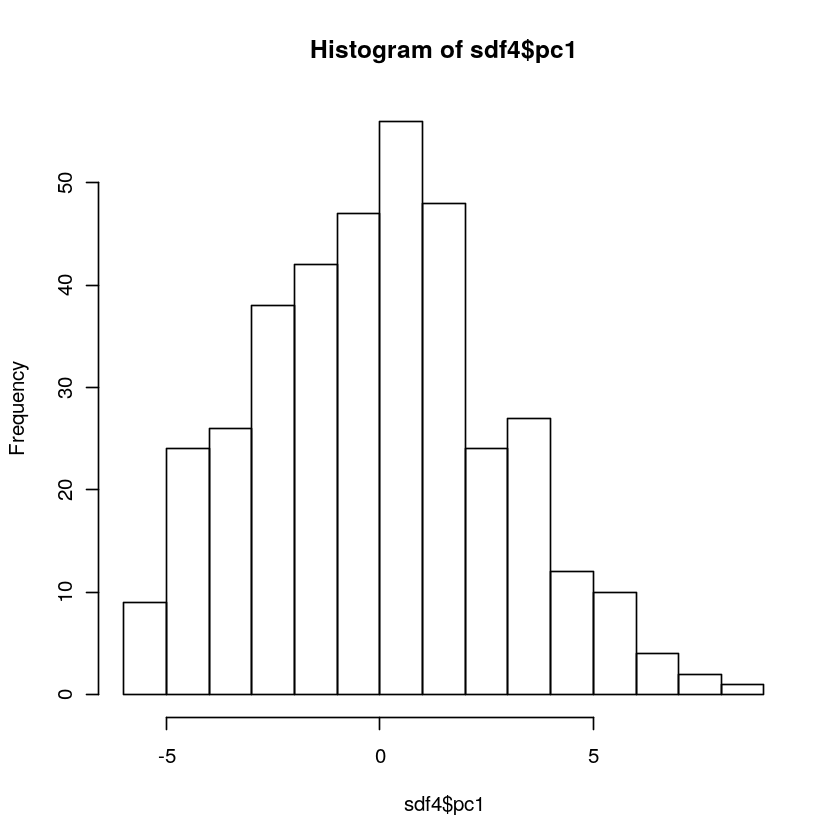

In [71]:
hist(sdf4$pc1)

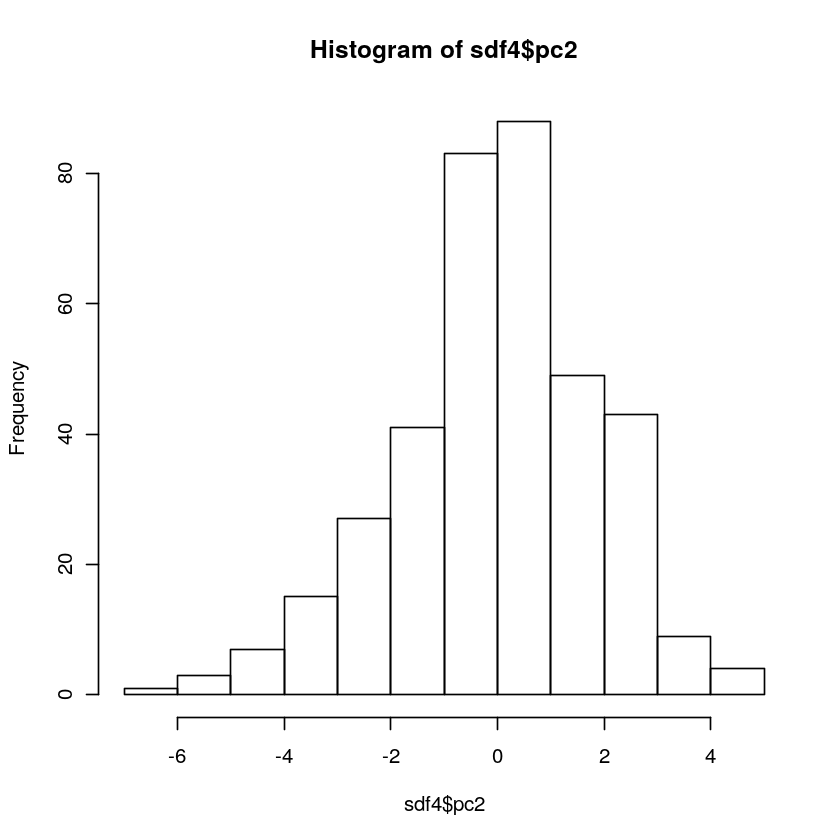

In [72]:
hist(sdf4$pc2)

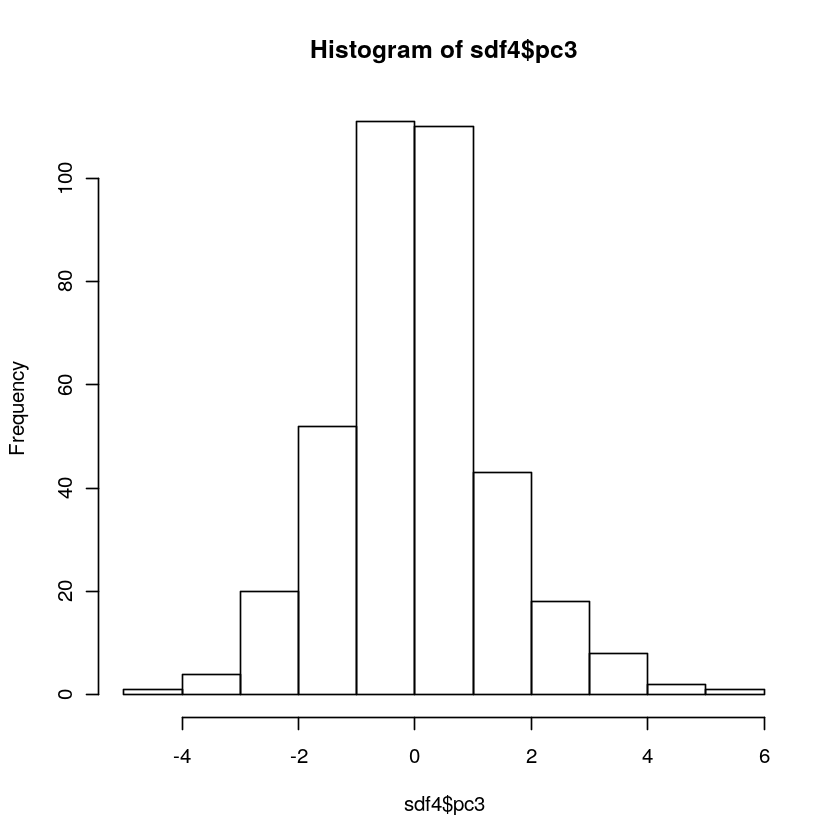

In [73]:
hist(sdf4$pc3)

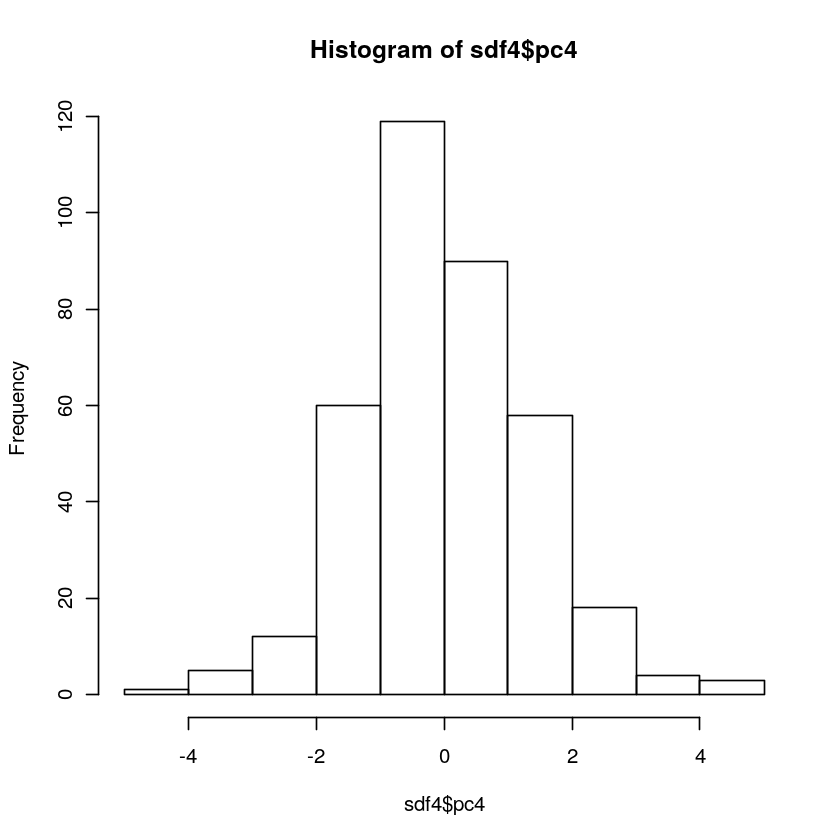

In [74]:
hist(sdf4$pc4)